# Regularization
models with a large number of free parameters can describe
an amazingly wide range of phenomena. Even if such a model agrees well with the available
data, that doesn’t make it a good model. It may just mean there’s enough freedom in the
model that it can describe almost any data set of the given size, without capturing any
genuine insights into the underlying phenomenon. When that happens, the model will work
well for the existing data, but will fail to generalize to new situations.


Regularization is a technique used in machine learning to prevent overfitting. Overfitting occurs when a model performs very well on training data but poorly on new, unseen data. Regularization introduces a penalty on the complexity of the model, effectively reducing the risk of overfitting.

Here are some of the common regularization methods and a brief example of how they are applied in the context of linear regression:

1. **L1 Regularization (Lasso Regression)**:
    - It adds a penalty equivalent to the absolute value of the magnitude of the coefficients.
    - $ \text{Loss function} = \text{Original Loss} + \lambda \sum_{i=1}^{n} |w_i| $
Where:
- $\lambda$ is the regularization strength. A larger value of $\lambda$ will result in more regularization.
- $w_i$ represents the model coefficients.
- $\sum_{i=1}^{n} |w_i|$ is the sum of the absolute values of the coefficients.

---

2. **L2 Regularization (Ridge Regression)**:
    - It adds a penalty equivalent to the square of the magnitude of the coefficients.
$ \text{Loss function} = \text{Original Loss} + \lambda \sum_{i=1}^{n} w_i^2 $

Where:
- $\lambda$ is the regularization strength.
- $w_i$ represents the model coefficients.
- $\sum_{i=1}^{n} w_i^2$ is the sum of the squares of the coefficients.

---

3. **Elastic Net**:
    - A combination of L1 and L2 regularization.
    - $ \text{Loss function} = \text{Original Loss} + \lambda_1 \sum_{i=1}^{n} |w_i| + \lambda_2 \sum_{i=1}^{n} w_i^2 $

Where:
- $\lambda_1$ and $\lambda_2$ are the regularization strengths for L1 and L2, respectively.

## Ordinary least squares (OLS) linear regression

---

### **Linear Model Definition**

Let’s define the linear regression model in matrix form:

$
X_{m \times n} \, \vec{\beta}_{n \times 1} = Y_{m \times 1}
$

- $ X $: matrix of input features (each row is a data sample, each column is a feature)
- $ \vec{\beta} $: vector of model parameters (weights)
- $ Y $: vector of target outputs

---

###  **Least Squares Loss Function**

The loss function $ L $ is the squared error between predicted and actual outputs:

$
L(D, \vec{\beta}) = \| X \vec{\beta} - Y \|^2
$

This expands as:

$
L(D, \vec{\beta}) = (X \vec{\beta} - Y)^T (X \vec{\beta} - Y)
$

Expanding the quadratic expression:

$
= Y^T Y - Y^T X \vec{\beta} - \vec{\beta}^T X^T Y + \vec{\beta}^T X^T X \vec{\beta}
$

Note:
- $ Y^T X \vec{\beta} $ and $ \vec{\beta}^T X^T Y $ are scalars and equal (transpose of each other).

---

###  **Gradient of the Loss Function**

We compute the gradient of $ L $ with respect to $ \vec{\beta} $:

$
\frac{\partial L}{\partial \vec{\beta}} = \frac{\partial}{\partial \vec{\beta}} \left( Y^T Y - 2 \vec{\beta}^T X^T Y + \vec{\beta}^T X^T X \vec{\beta} \right)
$

- $ Y^T Y $ is constant → derivative is 0
- $ -2 \vec{\beta}^T X^T Y $ → derivative is $ -2 X^T Y $
- $ \vec{\beta}^T X^T X \vec{\beta} $ → derivative is $ 2 X^T X \vec{\beta} $

So:

$
\frac{\partial L}{\partial \vec{\beta}} = -2 X^T Y + 2 X^T X \vec{\beta}
$

---

###  **Setting the Gradient to Zero (First-Order Optimality Condition)**

Set the gradient to zero and solve for $ \vec{\beta} $:

$
-2 X^T Y + 2 X^T X \vec{\beta} = 0
$

$
\Rightarrow X^T X \vec{\beta} = X^T Y
$

Assuming $ X^T X $ is invertible:

$
\Rightarrow \vec{\hat{\beta}} = (X^T X)^{-1} X^T Y
$

This is the **closed-form solution** for the optimal parameters in ordinary least squares.

---



## L2 (Ridge aka Tikhonov) Regularization on Standard Linear Regression


Recall from before:

$
\hat{\beta} = (X^T X)^{-1} X^T Y
$

This solution minimizes the squared error:

$
L(\vec{\beta}) = \|X \vec{\beta} - Y\|^2
$

---

Now Add **L2 Regularization**: Ridge Regression

We **penalize large weights** by adding a regularization term to the loss:

$
L_{\text{ridge}}(\vec{\beta}) = \|X \vec{\beta} - Y\|^2 + \lambda \|\vec{\beta}\|^2
$

- $ \|\vec{\beta}\|^2 = \vec{\beta}^T \vec{\beta} $ is the **L2 norm**
- $ \lambda \geq 0 $ is the **regularization strength**

**Interpretation**:
- We want to **fit the data well** (small prediction error)
- But we also want **weights to stay small**, avoiding complex, overfitted models

---

###  Ridge Regression Closed-Form Solution

$
\hat{\beta}_R = (X^T X + \lambda I)^{-1} X^T Y
$

We add $ \lambda I $ to the matrix we invert. This:
  - Improves stability when $ X^T X $ is ill-conditioned or singular
  - Encourages smaller weight values

---





 how the **lambda** term appears in the **closed-form solution of ridge regression**:

We start from the **ridge regression loss function**:

$
L_{\text{ridge}}(\vec{\beta}) = \|X \vec{\beta} - Y\|^2 + \lambda \|\vec{\beta}\|^2
$

This is the **objective we want to minimize** with respect to $ \vec{\beta} $.

---

### Step 1: Expand the Loss Function

We'll write both terms in a quadratic form.

1. **Data fitting term**:
$
\|X \vec{\beta} - Y\|^2 = (X \vec{\beta} - Y)^T (X \vec{\beta} - Y)
$

2. **Regularization term**:
$
\|\vec{\beta}\|^2 = \vec{\beta}^T \vec{\beta}
$

So the total loss becomes:

$
L_{\text{ridge}}(\vec{\beta}) = (X \vec{\beta} - Y)^T (X \vec{\beta} - Y) + \lambda \vec{\beta}^T \vec{\beta}
$

---

### Step 2: Take the Gradient w.r.t. $ \vec{\beta} $

We take the derivative of the loss with respect to $ \vec{\beta} $ and set it to zero to find the minimizing solution.

First, compute the gradient:

$
\nabla_{\vec{\beta}} \left[(X \vec{\beta} - Y)^T (X \vec{\beta} - Y)\right] = 2 X^T (X \vec{\beta} - Y)
$

$
\nabla_{\vec{\beta}} \left[\lambda \vec{\beta}^T \vec{\beta}\right] = 2 \lambda \vec{\beta}
$

Now, the total gradient:

$
\nabla_{\vec{\beta}} L_{\text{ridge}}(\vec{\beta}) = 2 X^T (X \vec{\beta} - Y) + 2 \lambda \vec{\beta}
$

---

### Step 3: Set the Gradient to Zero

$
2 X^T (X \vec{\beta} - Y) + 2 \lambda \vec{\beta} = 0
$

Divide by 2:

$
X^T (X \vec{\beta} - Y) + \lambda \vec{\beta} = 0
$

Distribute $ X^T $:

$
X^T X \vec{\beta} - X^T Y + \lambda \vec{\beta} = 0
$

Group the $ \vec{\beta} $ terms:

$
(X^T X + \lambda I) \vec{\beta} = X^T Y
$

---

### Step 4: Solve for $ \vec{\beta} $

$
\hat{\beta}_R = (X^T X + \lambda I)^{-1} X^T Y
$

---



The term $ \lambda I $ comes from taking the derivative of the regularization term $ \lambda \vec{\beta}^T \vec{\beta} $. Adding this term stabilizes the inversion and penalizes large values in $ \vec{\beta} $, which helps with generalization.

Let me know if you'd like to go through an example or see how it works numerically!

## Polynomial Curve Fitting with L2 Regularization
The following script demonstrates **polynomial curve fitting** with and without **Tikhonov regularization** (also known as Ridge Regression), using synthetic noisy data. It includes:

1. Polynomial data generation
2. Solving for the best-fit polynomial using:
   - Pseudo-inverse (least squares)
   - Ridge regression (regularized least squares)
3. Plotting to show overfitting and the effect of regularization

---


### **1. `tikhonovRegularizedLeastSquares`**
```python
def tikhonovRegularizedLeastSquares(x, y, alpha):
    ...
```
Performs **Ridge Regression**:
- Regularizes the least squares problem:  
  $
  \theta = (X^T X + \alpha I)^{-1} X^T y
  $
- `alpha` controls regularization strength. Large `alpha` shrinks parameters toward zero (reducing variance).

---

### **2. `xPolynominalExtender`**
```python
def xPolynominalExtender(x, PolynominalOrder=1):
    ...
```
Builds a **design matrix** for polynomial regression. For order 2:
$
X = [x^2, x^1, x^0]
$
So a column of 1s is always added for the bias term.

---

### **3. `polynominalFunction`**
```python
def polynominalFunction(x, coefficients):
    ...
```
Evaluates a polynomial using the given `coefficients`.

---

### **4. `pseudoInverseSolver`**
```python
def pseudoInverseSolver(x, y):
    ...
```
Solves the linear regression via Moore-Penrose **pseudo-inverse**:
$
\theta = (X^T X)^{-1} X^T y
$

---

### **5. Data generation and plotting**

```python
x = np.linspace(x_min, x_max, number_of_samples)
...
y = polynominalFunction(x, [m, b]) + noise
```

Generates a **linear** relationship `y = mx + b` with noise, and plots:
- The true line
- Polynomial fits of varying order (10, 11, 12)
- Regularized fits

---


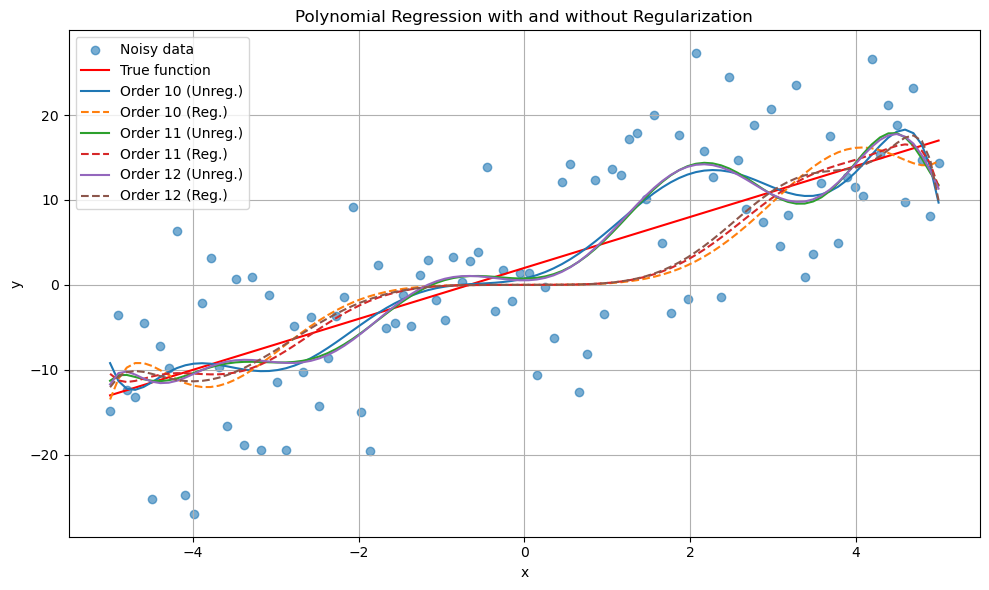

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def tikhonov_regularized_least_squares(X, y, alpha):
    """
    Ridge regression (Tikhonov regularization)
    Solves: theta = (X^T X + alpha * I)^-1 X^T y
    """
    n = X.shape[1]
    X_T = X.T
    I = np.eye(n)
    theta = np.linalg.inv(X_T @ X + alpha * I) @ X_T @ y
    return theta


def polynomial_extender(x, order=1):
    """
    Create polynomial features of the input x up to a specified order.
    E.g., x^n, ..., x^2, x^1, 1
    """
    num_samples = x.shape[0]
    poly_features = np.ones((num_samples, order + 1))
    for i in range(order):
        poly_features[:, i] = np.power(x[:, 0], order - i)
    return poly_features


def evaluate_polynomial(x, coeffs):
    """
    Evaluate polynomial at x given coeffs.
    coeffs[0]*x^n + coeffs[1]*x^(n-1) + ... + coeffs[-1]*x^0
    """
    y = np.zeros_like(x)
    for i, c in enumerate(reversed(coeffs)):
        y += c * np.power(x, i)
    return y


def pseudo_inverse_solver(X, y):
    """
    Compute the least squares solution using the pseudo-inverse.
    """
    return np.linalg.pinv(X) @ y


# Parameters
noise_magnitude = 8
num_samples = 100
x_min, x_max = -5, 5
true_slope = 3
true_intercept = 2
regularization_alpha = 20000

# Generate synthetic data
x = np.linspace(x_min, x_max, num_samples).reshape(-1, 1)
true_y = evaluate_polynomial(x, [true_slope, true_intercept])
noisy_y = true_y + noise_magnitude * np.random.randn(num_samples, 1)

# Plot noisy data and true line
plt.figure(figsize=(10, 6))
plt.scatter(x, noisy_y, alpha=0.6, label='Noisy data')
plt.plot(x, true_y, color='red', label='True function')

# Fit polynomial models of different orders
for order in range(10, 13):
    X_poly = polynomial_extender(x, order)

    # Unregularized solution
    params = pseudo_inverse_solver(X_poly, noisy_y)
    pred_y = evaluate_polynomial(x, params)
    plt.plot(x, pred_y, label=f'Order {order} (Unreg.)')

    # Regularized solution
    reg_params = tikhonov_regularized_least_squares(X_poly, noisy_y, regularization_alpha)
    reg_pred_y = evaluate_polynomial(x, reg_params)
    plt.plot(x, reg_pred_y, '--', label=f'Order {order} (Reg.)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression with and without Regularization')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

